<a href="https://colab.research.google.com/github/ajithpalanisamy321-commits/indianmovies26/blob/main/Indians_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model Evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Keras (TensorFlow backend)
from keras import Sequential, Input
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv',
                 names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                        "BMI", "Diabetes Pedigreefunction", "Age", "Outcome"])
# Basic info
# df.info
# df.head()

In [ ]:
from collections import Counter
Counter(df['Outcome'])

Counter({1: 268, 0: 500})

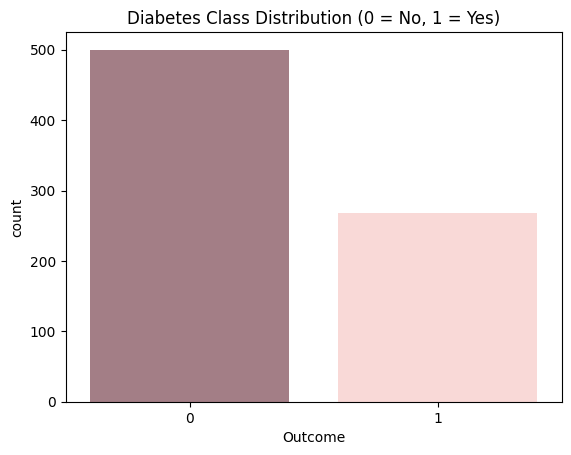

In [ ]:
sns.countplot(x='Outcome', data=df, hue='Outcome', palette=["#a97882", "#ffd4d1"], legend=False)
plt.title("Diabetes Class Distribution (0 = No, 1 = Yes)")
plt.show()

In [ ]:
# Data cleaning replacing values of '0' with np.nan and then imputing it with the median value of the corresponding columns (common in healthcare data)
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Impute with median
df.fillna(df.median(), inplace=True)


In [ ]:
# Assign the independent variables to X and the target column to y
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
Counter(y)

Counter({1: 268, 0: 500})

In [ ]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [ ]:
Counter(y_train)

Counter({1: 199, 0: 377})

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
Counter(y_train_smote)

Counter({1: 377, 0: 377})

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# ANN Architecture
model = Sequential()
# Input Layer
model.add(Input(shape=(X_train_smote.shape[1],)))

# 1st Hidden Layer
model.add(Dense(units=16, activation='relu'))

# 2nd Hidden Layer
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.25))  # Dropout for regularization

# Output Layer
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model

history = model.fit(X_train_smote, y_train_smote,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.4776 - loss: 0.8245 - val_accuracy: 0.1722 - val_loss: 1.0201
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5599 - loss: 0.7656 - val_accuracy: 0.2185 - val_loss: 0.9354
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5823 - loss: 0.7268 - val_accuracy: 0.2517 - val_loss: 0.8806
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5951 - loss: 0.6952 - val_accuracy: 0.2384 - val_loss: 0.8583
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6262 - loss: 0.6921 - val_accuracy: 0.2914 - val_loss: 0.8345
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6603 - loss: 0.6610 - val_accuracy: 0.3179 - val_loss: 0.8209
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6557 - loss: 0.6497 - val_accuracy: 0.3775 - val_loss: 0.7850
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7035 - loss: 0.6085 - val_accuracy: 0.

In [ ]:
history_df = pd.DataFrame(history.history)
# history_df

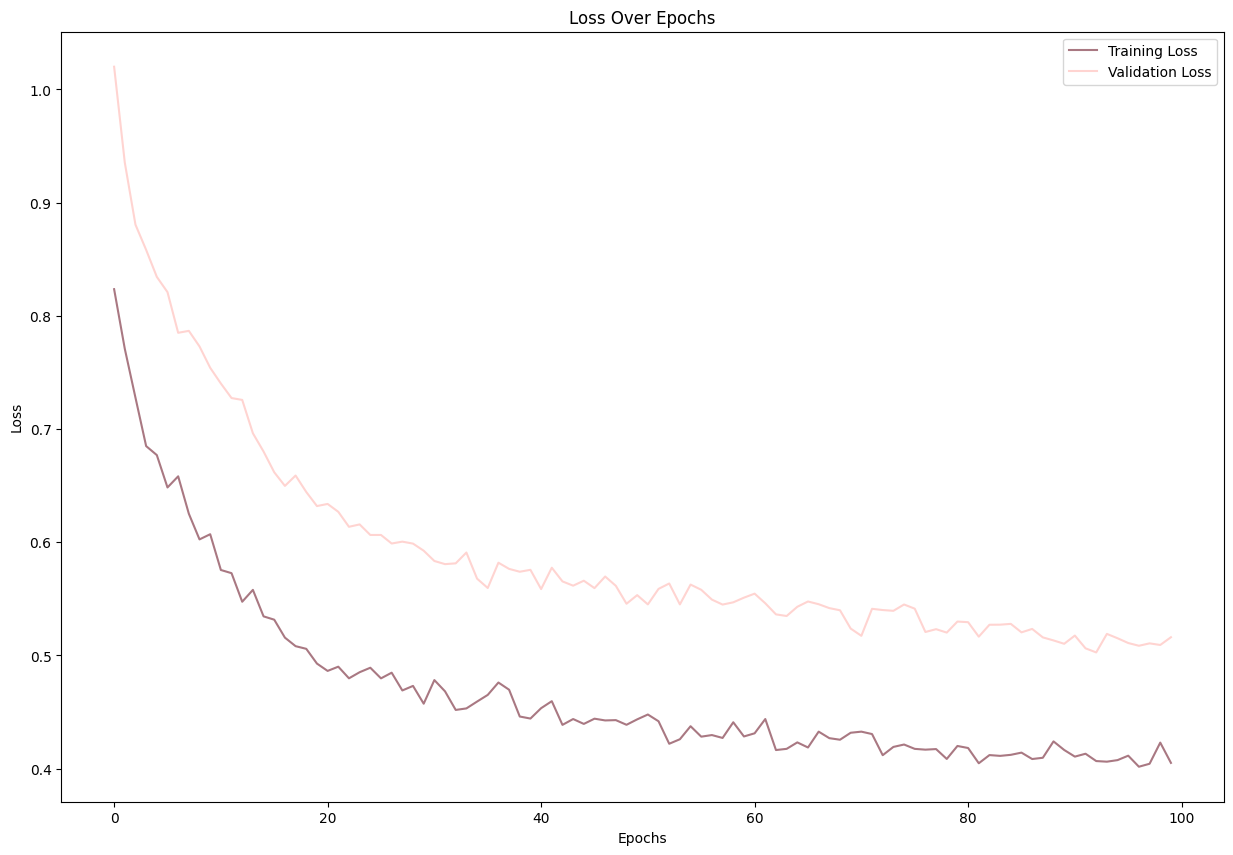

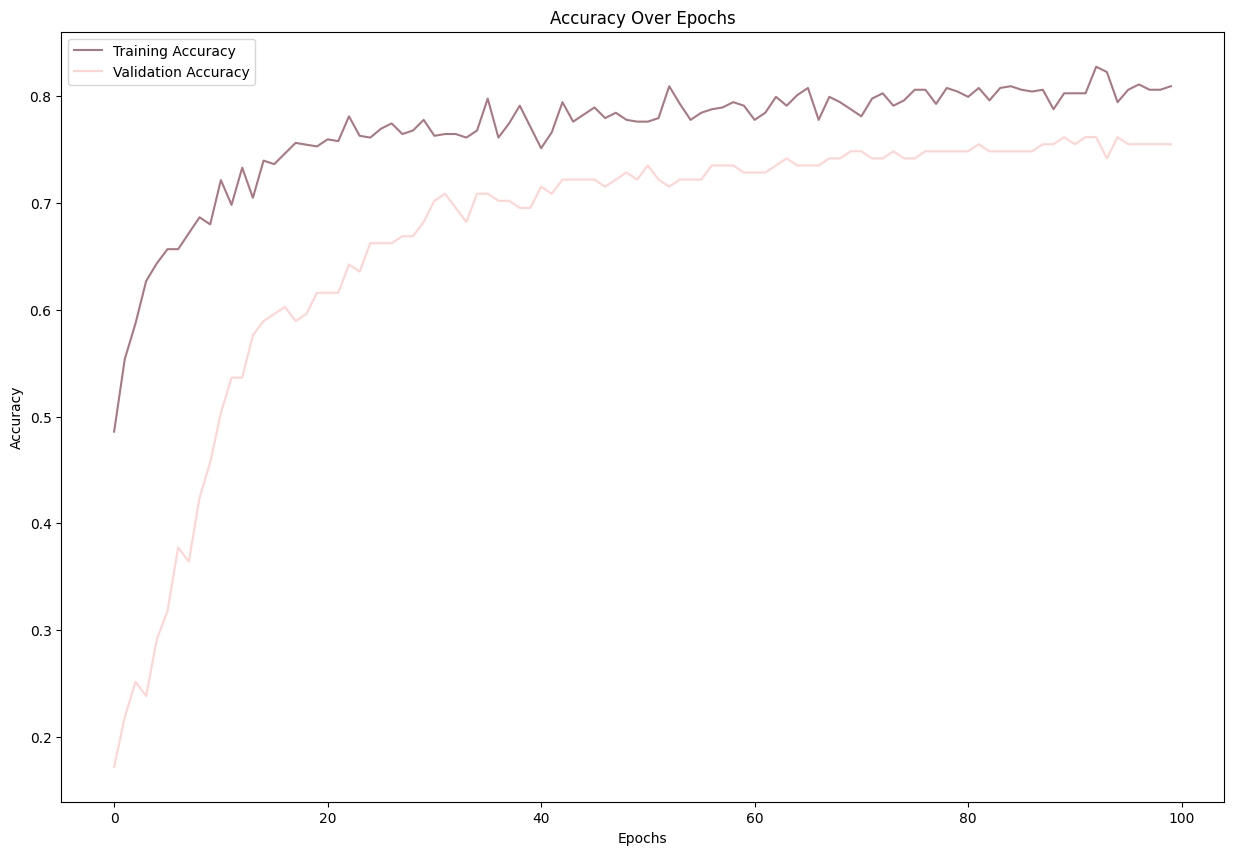

In [ ]:
# Plot Loss
plt.figure(figsize=(15, 10))
plt.plot(history_df['loss'], label='Training Loss', color='#a97882')
plt.plot(history_df['val_loss'], label='Validation Loss', color='#ffd4d1')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot Accuracy
plt.figure(figsize=(15, 10))
plt.plot(history_df['accuracy'], label='Training Accuracy', color='#a97882')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy', color='#ffd4d1')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


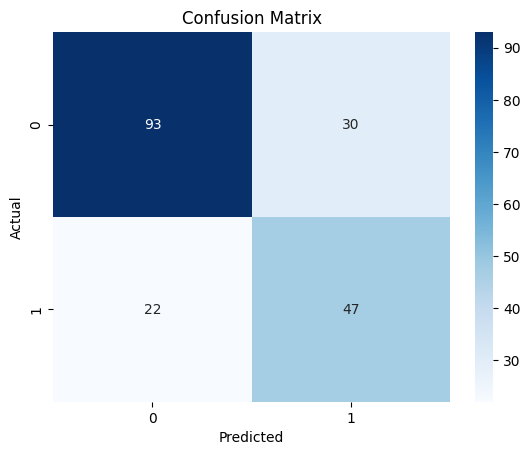

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       123
           1       0.61      0.68      0.64        69

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.71       192
weighted avg       0.74      0.73      0.73       192

Accuracy Score: 0.73


In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_labels))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_labels):.2f}")